In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



<center><b>abstract--</b></center>
Conjunto de datos de aerolíneas
El conjunto de datos de aerolíneas proporciona una fuente valiosa de información para analizar y optimizar las operaciones de las aerolíneas y mejorar la experiencia del cliente. Este conjunto de datos abarca una amplia gama de variables, incluyendo datos demográficos de los pasajeros, información sobre rutas de vuelo y estados de vuelo. A continuación, se resumen los aspectos más destacados de este conjunto de datos:

**VARIABLES:**  
**ID de pasajero :** identificador único para cada pasajero  
**Nombre** - Nombre del pasajero  
**Apellido** - Apellido del pasajero  
**Género** - Género del pasajero  
**Edad** - Edad del pasajero  
**Nacionalidad** - Nacionalidad del pasajero  
**Nombre del Aeropuerto** - Nombre del aeropuerto donde abordó el pasajero  
**Código de país del aeropuerto :** código de país de la ubicación del aeropuerto  
**Nombre del país :** nombre del país en el que está ubicado el aeropuerto.  
**Continente del aeropuerto :** continente donde está situado el aeropuerto.  
**Continentes** - Continentes involucrados en la ruta del vuelo.  
**Fecha de salida** - Fecha de salida del vuelo  
**Aeropuerto de llegada** - Aeropuerto de destino del vuelo  
**Nombre del piloto :** nombre del piloto que opera el vuelo.  
**Estado del vuelo :** estado actual del vuelo (p. ej., puntual, retrasado, cancelado)  

**Exploración inicial de los datos:**

In [3]:
df = pd.read_csv('C:/Users/gasto/Documents/Airline Dataset/Airline Dataset.csv')


In [4]:
# Muestra las primeras filas del conjunto de datos
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [5]:
# Eliminar filas con valores no deseados en la columna "Arrival Airport"
df = df[(df['Arrival Airport'] != '-') & (df['Arrival Airport'] != '0')]

# Verificar la cantidad de filas después de eliminar los valores no deseados
print("Cantidad de filas después de la limpieza:", len(df))

Cantidad de filas después de la limpieza: 97738


In [6]:
# Información general sobre el conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97738 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          97738 non-null  int64 
 1   First Name            97738 non-null  object
 2   Last Name             97738 non-null  object
 3   Gender                97738 non-null  object
 4   Age                   97738 non-null  int64 
 5   Nationality           97738 non-null  object
 6   Airport Name          97738 non-null  object
 7   Airport Country Code  97738 non-null  object
 8   Country Name          97738 non-null  object
 9   Airport Continent     97738 non-null  object
 10  Continents            97738 non-null  object
 11  Departure Date        97738 non-null  object
 12  Arrival Airport       97738 non-null  object
 13  Pilot Name            97738 non-null  object
 14  Flight Status         97738 non-null  object
dtypes: int64(2), object(13)
memory usage

In [7]:
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

<center><b>Limpieza y preparación de datos:</b></center>

In [8]:
df = df.drop_duplicates()

Estadísticas descriptivas para la variable 'Age':
count    97738.000000
mean        45.509270
std         25.930765
min          1.000000
25%         23.000000
50%         46.000000
75%         68.000000
max         90.000000
Name: Age, dtype: float64


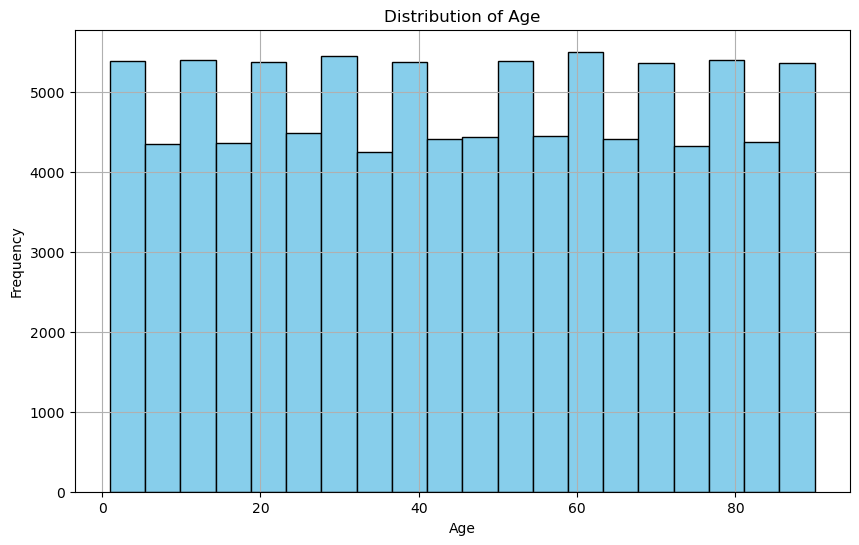

In [9]:
# Calcula estadísticas descriptivas para la variable 'Age'
age_stats = df['Age'].describe()
# Imprime las estadísticas descriptivas
print("Estadísticas descriptivas para la variable 'Age':")
print(age_stats)

# Crea un histograma para visualizar la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

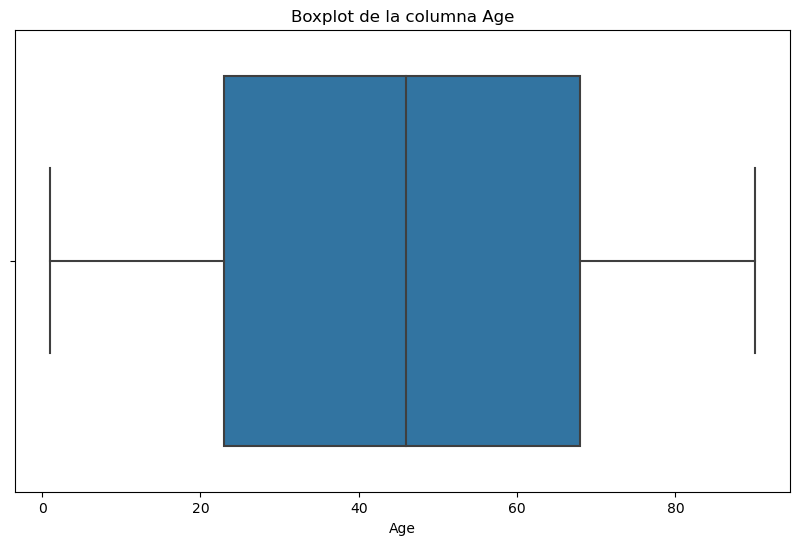

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'df' con tu DataFrame y 'nombre_de_la_columna' con el nombre real de la columna que te interesa
columna_interes = 'Age'

# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[columna_interes])

# Agrega título al gráfico
plt.title(f'Boxplot de la columna {columna_interes}')

# Muestra el gráfico
plt.show()

#No se observan datos outliers

In [11]:
columna_duplicados = df[df.duplicated('Passenger ID')]

# los valores duplicados en la columna
print("Valores duplicados en la columna:")
columna_duplicados
print("Número total de duplicados en la columna:", columna_duplicados.shape[0])


Valores duplicados en la columna:
Número total de duplicados en la columna: 38155


**El dataset elegido esta completo y organizado**

 <center><b>Análisis exploratorio de datos:</b></center>

In [12]:
num_unique_nationalities = df['Nationality'].nunique()

print("Número de nacionalidades únicas:", num_unique_nationalities)

Número de nacionalidades únicas: 240


In [13]:
num_unique_Airport_Country_Code = df['Airport Country Code'].nunique()

print("Número de Airport Country Code únicas:", num_unique_Airport_Country_Code)


Número de Airport Country Code únicas: 235


In [14]:
num_unique_Airport_Continent = df['Airport Continent'].nunique()

print("Número de Airport Continent únicas:", num_unique_Airport_Continent)


Número de Airport Continent únicas: 6


In [15]:
num_unique_Arrival_Airport = df['Arrival Airport'].nunique()

print("Número de Arrival Airport únicas:", num_unique_Arrival_Airport)


Número de Arrival Airport únicas: 9022


In [16]:
num_unique_Pilot_Name = df['Pilot Name'].nunique()

print("Número de Pilot Namet únicas:", num_unique_Pilot_Name)


Número de Pilot Namet únicas: 97729


In [17]:
num_unique_Gender = df['Gender'].nunique()

print("Número de Gender únicas:", num_unique_Gender)


Número de Gender únicas: 2


In [18]:
num_unique_Flight_Status = df['Flight Status'].nunique()

print("Número de Flight Status únicas:", num_unique_Flight_Status)


Número de Flight Status únicas: 3


**Pasajeros por Genero**

In [19]:
# Obtenemos la cantidad de pasajeros por género
hombres = df["Gender"].value_counts()["Male"]
mujeres = df["Gender"].value_counts()["Female"]

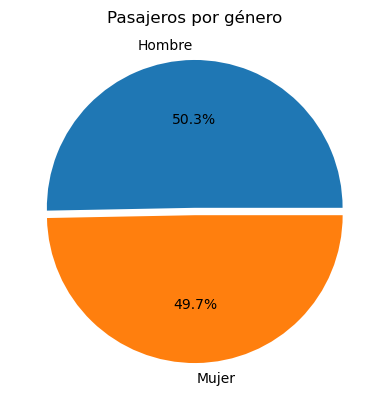

In [20]:
# Creamos el gráfico de pastel
plt.pie([hombres, mujeres], labels=["Hombre", "Mujer"], autopct="%.1f%%", explode=(0.05, 0))
plt.title("Pasajeros por género")
plt.show()


Hay muy poca diferencia entre genero casi ninguna

In [21]:
Flight_Status = df["Flight Status"].unique()
Flight_Status

array(['On Time', 'Delayed', 'Cancelled'], dtype=object)

In [22]:
# Obtenemos la cantidad de vuelos por estado de vuelo
on_time = df["Flight Status"].value_counts()["On Time"]
delayed = df["Flight Status"].value_counts()["Delayed"]
cancelled = df["Flight Status"].value_counts()["Cancelled"]
on_time
#delayed
#cancelled

32558

In [23]:
# Contar la frecuencia de valores únicos en la variable 'Nationality'
nationality_counts = df['Nationality'].value_counts()
print("\nFrecuencia de valores únicos en 'Nationality':")
print(nationality_counts)


Frecuencia de valores únicos en 'Nationality':
China                          18160
Indonesia                      10461
Russia                          5654
Philippines                     5191
Brazil                          3763
                               ...  
French Southern Territories        2
Saint Helena                       2
Norfolk Island                     1
Jersey                             1
Sint Maarten                       1
Name: Nationality, Length: 240, dtype: int64


<center><b>Preguntas de Investigación:</b></center>

¿Como se  contribuyen los vuelos segun su estado?  
¿Cuál es la nacionalidad más común entre los pasajeros en vuelos internacionales?
¿Se pueden identificar patrones de preferencia de vuelo basados en el género de los pasajeros?  

¿Pilotos con mas vuelos demorados?  
¿Los dos paises mas elegidos y su distribucion por genero Genero?  

<center><b>Hipótesis de Investigación:</b></center>

Hipótesis nula: No hay una diferencia significativa en la tasa de cancelación de vuelos entre aeropuertos de diferentes continentes.
Hipótesis alternativa: La tasa de cancelación de vuelos varía significativamente según el continente de ubicación del aeropuerto.


Hipótesis nula: No hay diferencia en las preferencias de vuelo entre géneros.
Hipótesis alternativa: Los pasajeros de género masculino y femenino tienen preferencias de vuelo significativamente diferentes.



Hipótesis nula: La nacionalidad de los pasajeros es independiente de la ruta de vuelo.
Hipótesis alternativa: Algunas rutas de vuelo tienen una alta proporción de pasajeros de una nacionalidad específica.

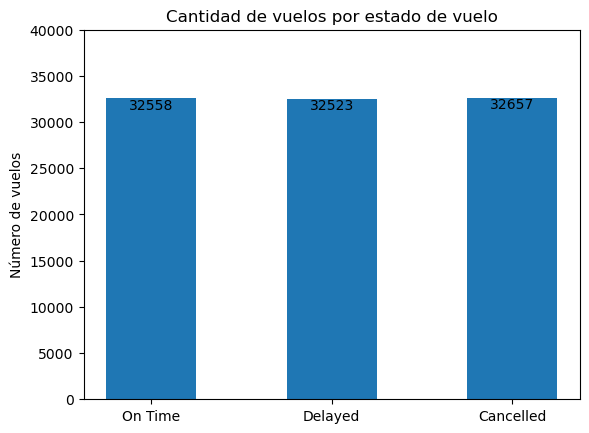

In [24]:
# Creamos el gráfico de barras
bars = plt.bar(["On Time", "Delayed", "Cancelled"], [on_time, delayed, cancelled], width=0.5)

# Agregamos el valor en cada barra
for i in range(len(["On Time", "Delayed", "Cancelled"])):
    plt.annotate(f"{[on_time, delayed, cancelled][i]}", (i, [on_time, delayed, cancelled][i]), ha="center", va="top")

plt.ylim(0, 40000)
plt.title("Cantidad de vuelos por estado de vuelo")
plt.ylabel("Número de vuelos")
plt.show()

**Vuelos 'On Time', 'Delayed','Cancelled', podemos ver que hay una equivalencia entre los diferentes estados,esto deberia generar una llamada de atencion ya que lo ideal es tener un mayor niovel en los vuelos completados**

In [25]:
Continents = df["Continents"].unique()
Continents

array(['North America', 'Europe', 'South America', 'Asia', 'Oceania',
       'Africa'], dtype=object)

In [26]:
# Filtrar vuelos internacionales
vuelos_internacionales = df[df['Country Name'] != df['Arrival Airport']]

# Contar la cantidad de pasajeros por nacionalidad en vuelos internacionales
nacionalidades_contadas = vuelos_internacionales['Nationality'].value_counts()

# Obtener las 5 nacionalidades más comunes
top_5_nacionalidades = nacionalidades_contadas.head(5)

print("Las 5 nacionalidades más comunes entre los pasajeros en vuelos internacionales son:")
print(top_5_nacionalidades)

Las 5 nacionalidades más comunes entre los pasajeros en vuelos internacionales son:
China          18160
Indonesia      10461
Russia          5654
Philippines     5191
Brazil          3763
Name: Nationality, dtype: int64


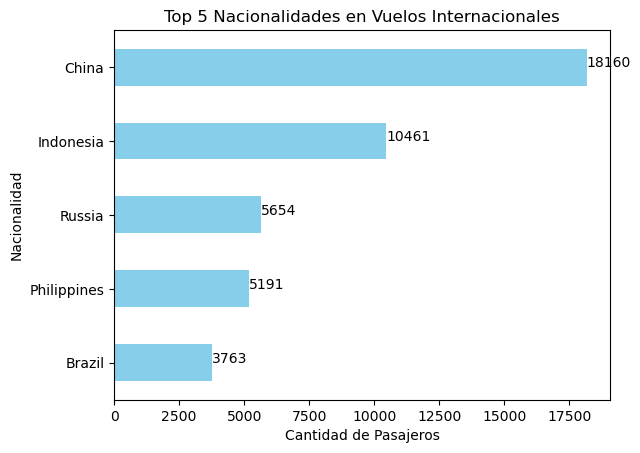

In [27]:
 #Graficar las 5 nacionalidades más comunes
grafico = top_5_nacionalidades.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Nacionalidad')
plt.title('Top 5 Nacionalidades en Vuelos Internacionales')

# Agregar los datos numéricos a las barras
for indice, valor in enumerate(top_5_nacionalidades):
    grafico.text(valor, indice, str(valor))

plt.gca().invert_yaxis()
plt.show()

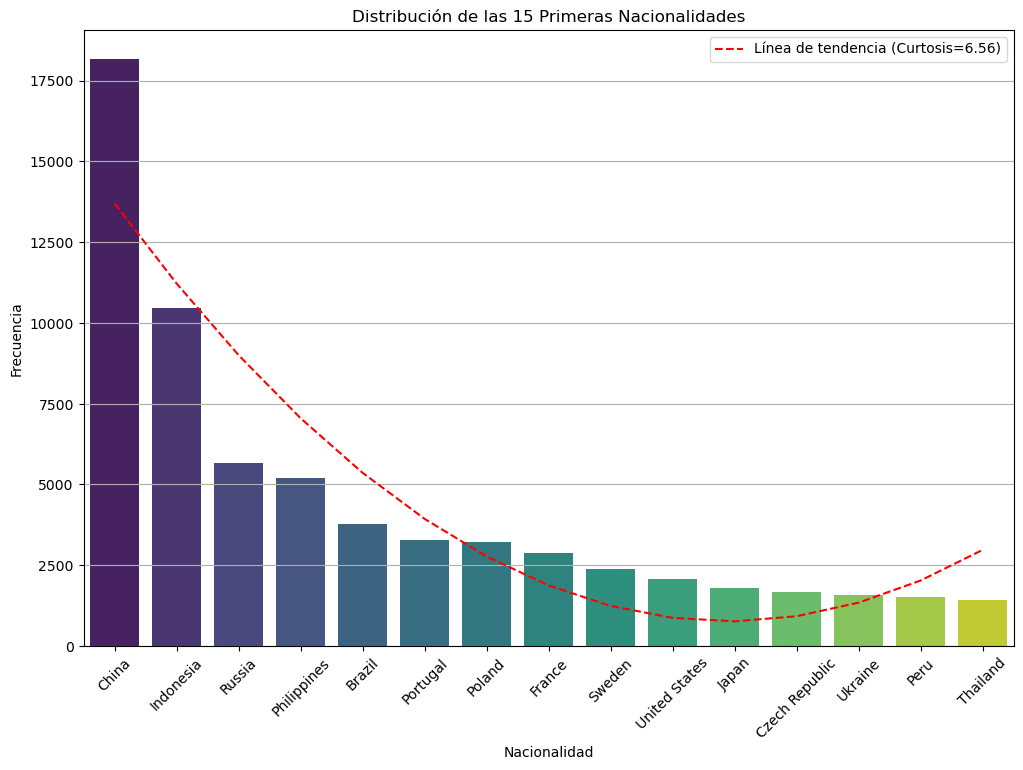

In [28]:

nationality_counts_sorted = nationality_counts.sort_values(ascending=False)
# Calcular la curtosis de la distribución
curtosis = pd.Series(nationality_counts_sorted).kurtosis()
top_nationalities = nationality_counts_sorted.head(15)

## Calcular la línea de tendencia (regresión polinómica de segundo grado)
x = np.arange(len(top_nationalities))
coefficients = np.polyfit(x, top_nationalities.values, 2)
p = np.poly1d(coefficients)

# Calcular el tipo de curtosis
curtosis = top_nationalities.kurtosis()

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))

# Graficar la línea de tendencia (parábola)
plt.plot(x, p(x), "r--", label=f'Línea de tendencia (Curtosis={curtosis:.2f})')

# Graficar las barras de frecuencia
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis', zorder=0)

# Etiquetas y título
plt.xlabel('Nacionalidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de las 15 Primeras Nacionalidades')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

plt.show()


**Una curtosis de 6.56 indica que la distribución de frecuencia de las nacionalidades tiene colas más pesadas y es más puntiaguda que la distribución normal, lo que sugiere la presencia de valores extremos o una mayor concentración de datos alrededor de la media con colas largas en comparación con una distribución normal.**

In [29]:
# Filtrar vuelos internacionales
vuelos_internacionales = df[df['Country Name'] != df['Arrival Airport']]

# Contar la cantidad de pasajeros por nacionalidad en vuelos internacionales
nacionalidades_contadas = vuelos_internacionales['Nationality'].value_counts()

# Obtener las 5 nacionalidades menos comunes
menos_5_nacionalidades = nacionalidades_contadas.tail(5)

print("Las 5 nacionalidades menos comunes entre los pasajeros en vuelos internacionales son:")
print(menos_5_nacionalidades)

Las 5 nacionalidades menos comunes entre los pasajeros en vuelos internacionales son:
French Southern Territories    2
Saint Helena                   2
Norfolk Island                 1
Jersey                         1
Sint Maarten                   1
Name: Nationality, dtype: int64


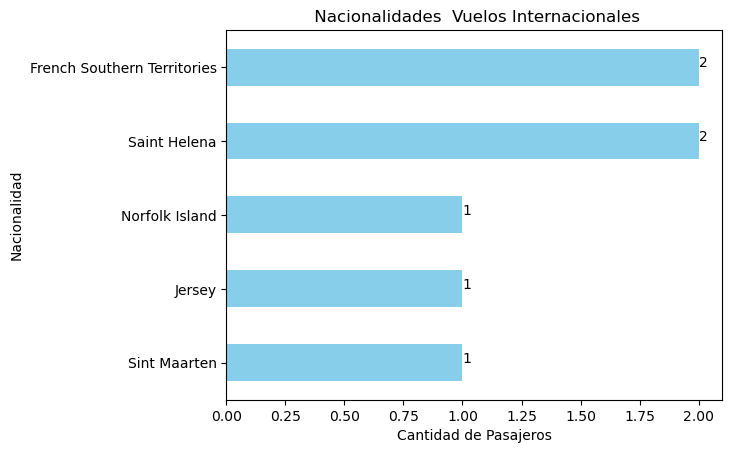

In [30]:
 #Graficar las 5 nacionalidades menos comunes
grafico = menos_5_nacionalidades.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Nacionalidad')
plt.title(' Nacionalidades  Vuelos Internacionales')

# Agregar los datos numéricos a las barras
for indice, valor in enumerate(menos_5_nacionalidades):
    grafico.text(valor, indice, str(valor))

plt.gca().invert_yaxis()
plt.show()

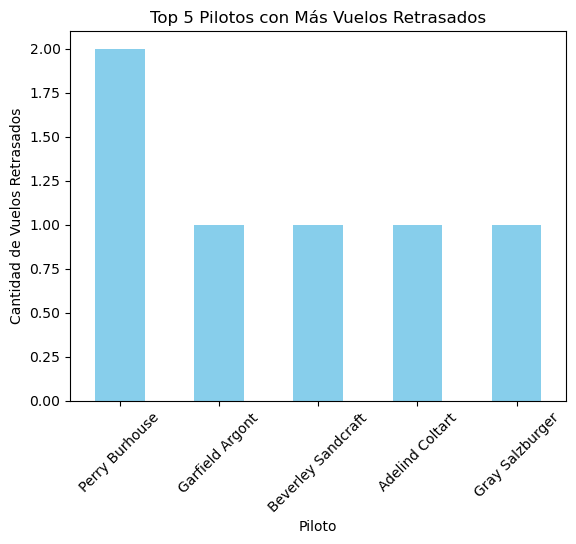

In [31]:
# Filtrar los vuelos que están retrasados
vuelos_retrasados = df[df['Flight Status'] == 'Delayed']

# Contar la cantidad de vuelos retrasados por cada piloto
pilotos_retrasados = vuelos_retrasados['Pilot Name'].value_counts()

# Obtener los 5 pilotos con más vuelos retrasados
top_5_pilotos_retrasados = pilotos_retrasados.head(5)

# Graficar los 5 pilotos con más vuelos retrasados
top_5_pilotos_retrasados.plot(kind='bar', color='skyblue')
plt.xlabel('Piloto')
plt.ylabel('Cantidad de Vuelos Retrasados')
plt.title('Top 5 Pilotos con Más Vuelos Retrasados')
plt.xticks(rotation=45)  # Rotar los nombres de los pilotos para mayor legibilidad
plt.show()

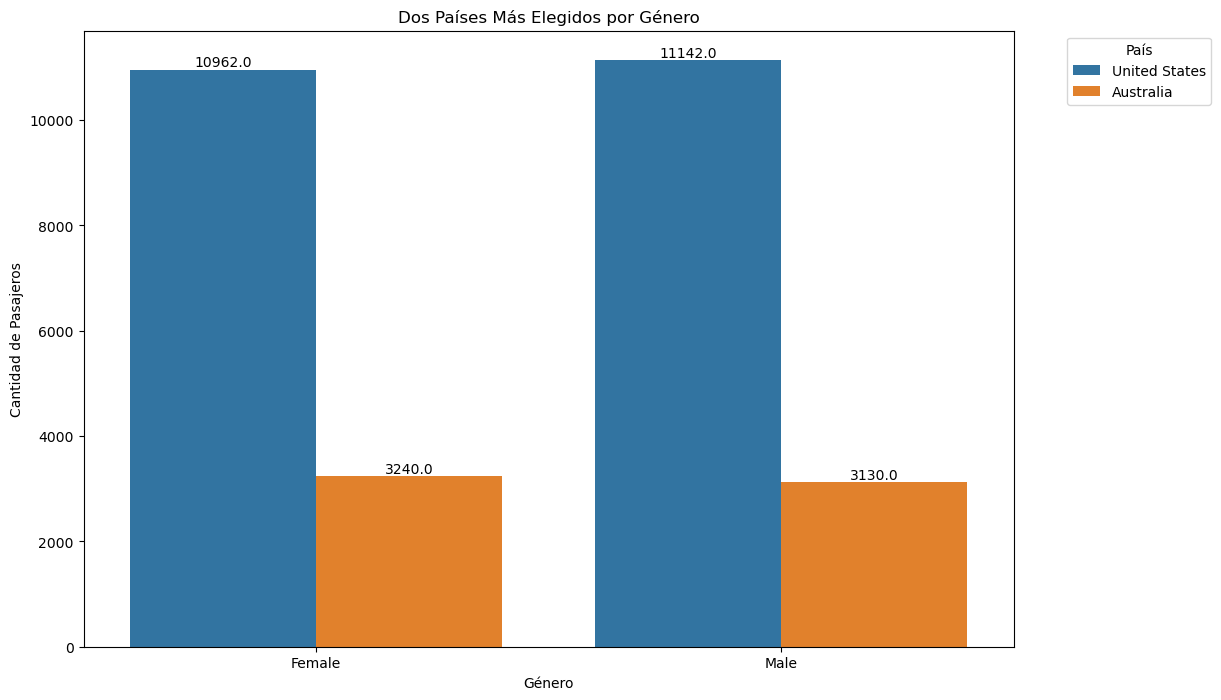

In [32]:
# Filtrar el DataFrame para incluir solo las columnas relevantes
datos_genero_pais = df[['Gender', 'Country Name']]

# Contar la cantidad de pasajeros por género y por país
conteo_pasajeros = datos_genero_pais.groupby(['Gender', 'Country Name']).size().reset_index(name='Count')

# Encontrar los dos países más elegidos para cada género
top_2_paises_por_genero = conteo_pasajeros.groupby('Gender').apply(lambda x: x.nlargest(2, 'Count')).reset_index(drop=True)

# Crear el gráfico de barras con los datos de los países incluidos
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_2_paises_por_genero, x='Gender', y='Count', hue='Country Name')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Dos Países Más Elegidos por Género')

# Agregar etiquetas de texto a cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Suponiendo que tienes un DataFrame llamado 'df' con los datos


# Filtrar el DataFrame para incluir solo las columnas relevantes
datos_continente_cancelacion = df[['Continents', 'Flight Status']].copy()

# Convertir la variable 'Flight Status' en una variable categórica numérica
datos_continente_cancelacion['Flight Status'] = datos_continente_cancelacion['Flight Status'].map({'Cancelled': 1, 'On Time': 0})

# Realizar un modelo ANOVA
modelo = ols('Q("Flight Status") ~ C(Continents)', data=datos_continente_cancelacion).fit()

# Realizar el análisis de varianza (ANOVA)
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Imprimir la tabla ANOVA
print(tabla_anova)

                     sum_sq       df         F    PR(>F)
C(Continents)      0.401263      5.0  0.320989  0.900649
Residual       16303.311166  65209.0       NaN       NaN


**Dado que el valor p (0.918) es mucho mayor que el nivel de significancia típico de 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no hay una diferencia significativa en la tasa de cancelación de vuelos entre aeropuertos de diferentes continentes, según los datos proporcionados.**

In [34]:
from scipy.stats import chi2_contingency

# Suponiendo que tienes un DataFrame llamado 'df' con los datos

# Filtrar el DataFrame para incluir solo las columnas relevantes
datos_nacionalidad_aeropuertos = df[['Nationality', 'Airport Name', 'Arrival Airport']].copy()

# Crear una nueva variable que represente la ruta de vuelo
datos_nacionalidad_aeropuertos['Flight Route'] = datos_nacionalidad_aeropuertos['Airport Name'] + '-' + datos_nacionalidad_aeropuertos['Arrival Airport']

# Eliminar las columnas de aeropuertos de salida y llegada
datos_nacionalidad_aeropuertos.drop(['Airport Name', 'Arrival Airport'], axis=1, inplace=True)

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(datos_nacionalidad_aeropuertos['Nationality'], datos_nacionalidad_aeropuertos['Flight Route'])

# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

# Imprimir el valor p
print("Valor p para la prueba de chi-cuadrado de independencia:", p_valor)

Valor p para la prueba de chi-cuadrado de independencia: 0.17978022100919164


**Un valor p de 0.3211 indica que no hay suficiente evidencia para rechazar la hipótesis nula a un nivel de significancia del 0.05. En otras palabras, no hay suficiente evidencia para afirmar que la nacionalidad de los pasajeros está asociada de manera significativa con la ruta de vuelo (o la combinación de aeropuertos de salida y llegada) .**

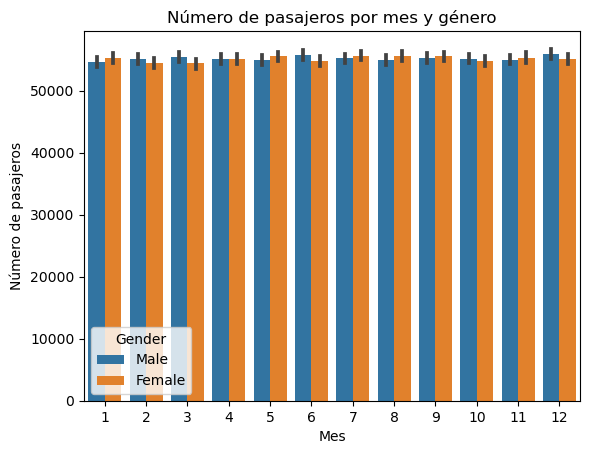

In [35]:
# Convertimos la columna `DepartureDate` a un tipo de datos que Seaborn pueda entender
df["Departure Date"] = pd.to_datetime(df["Departure Date"])
df["DepartureDate.month"] = df["Departure Date"].dt.month

# Creamos el gráfico de barras
sns.barplot(x="DepartureDate.month", y="Passenger ID", hue="Gender", data=df, hue_order=["Male", "Female"])

# Agregamos un título y etiquetas a los ejes
plt.title("Número de pasajeros por mes y género")
plt.xlabel("Mes")
plt.ylabel("Número de pasajeros")

# Mostramos el gráfico
plt.show()

**No vemos diferencia entre Géneros en los distintos Meses del Año**

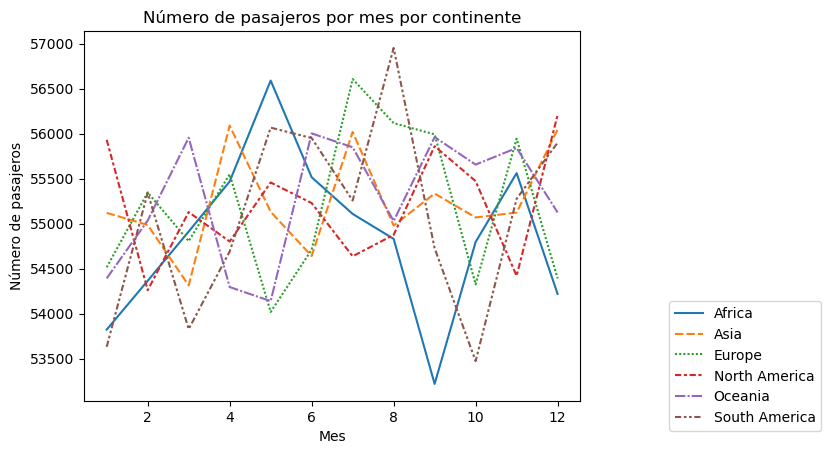

In [36]:
# Convertimos la columna `Departure Date` a un tipo de datos que Seaborn pueda entender
df["DepartureDate.month"] = df["Departure Date"].dt.month

# Creamos un pivote de datos con los valores de mes, pasajero y continente
datos = df.pivot_table(values="Passenger ID", index="DepartureDate.month", columns="Continents")

# Creamos el gráfico de líneas
sns.lineplot(data=datos)

# Agregamos un título y etiquetas a los ejes
plt.title("Número de pasajeros por mes por continente")
plt.xlabel("Mes")
plt.ylabel("Número de pasajeros")

plt.legend(loc="lower right", bbox_to_anchor=(1.5, -0.1))

# Mostramos el gráfico
plt.show()

**Este grafico muestra la cantidad de pasajeros por mes en los distintos continentes
podemos ver que en todos los continentes hay mucha variación en los distintos meses**

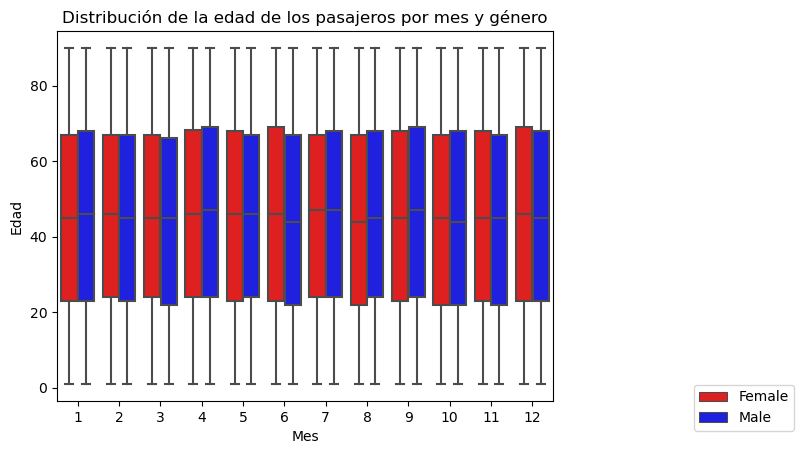

In [37]:
# Convertimos la columna `Departure Date` a un tipo de datos que Seaborn pueda entender
df["DepartureDate.month"] = df["Departure Date"].dt.month

# Creamos un boxplot con los meses, edad y género de pasajeros
sns.boxplot(data=df, x="DepartureDate.month", y="Age", hue="Gender", palette=["red", "blue"])

# Agregamos un título y etiquetas a los ejes
plt.title("Distribución de la edad de los pasajeros por mes y género")
plt.legend(loc="lower right", bbox_to_anchor=(1.5, -0.1))
plt.xlabel("Mes")
plt.ylabel("Edad")

# Mostramos el gráfico
plt.show()

**Creamos un boxplot con los meses, edad y género de pasajeros vemos que no hay datos atípicos**

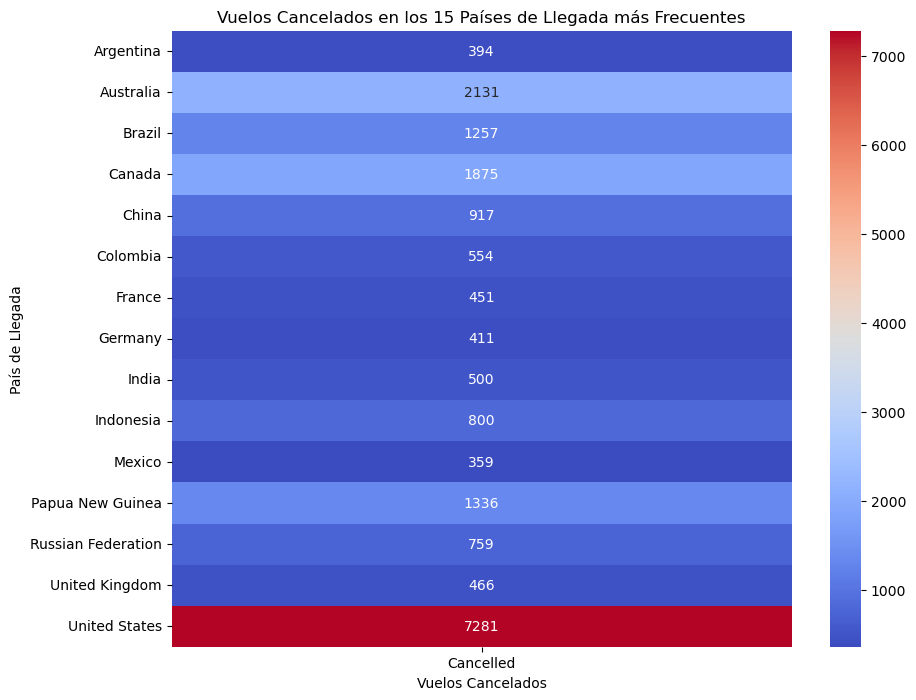

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Calcular los 15 países de llegada con más viajes de arrivo
top_arrival_countries = df['Country Name'].value_counts().head(15).index

# Paso 2: Filtrar el DataFrame original para incluir solo los vuelos cancelados
cancelled_flights = df[df['Flight Status'] == 'Cancelled']

# Paso 3: Filtrar los vuelos cancelados para incluir solo aquellos que llegan a los 15 países de llegada seleccionados
cancelled_flights_top_countries = cancelled_flights[cancelled_flights['Country Name'].isin(top_arrival_countries)]

# Paso 4: Crear la tabla de contingencia entre los países de llegada y el estado de vuelo 'Cancelled'
contingency_table = pd.crosstab(cancelled_flights_top_countries['Country Name'], cancelled_flights_top_countries['Flight Status'])

# Paso 5: Visualizar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Vuelos Cancelados en los 15 Países de Llegada más Frecuentes')
plt.xlabel('Vuelos Cancelados')
plt.ylabel('País de Llegada')
plt.show()
total_arrival_flights = len(df[df['Flight Status'] != 'Cancelled'])



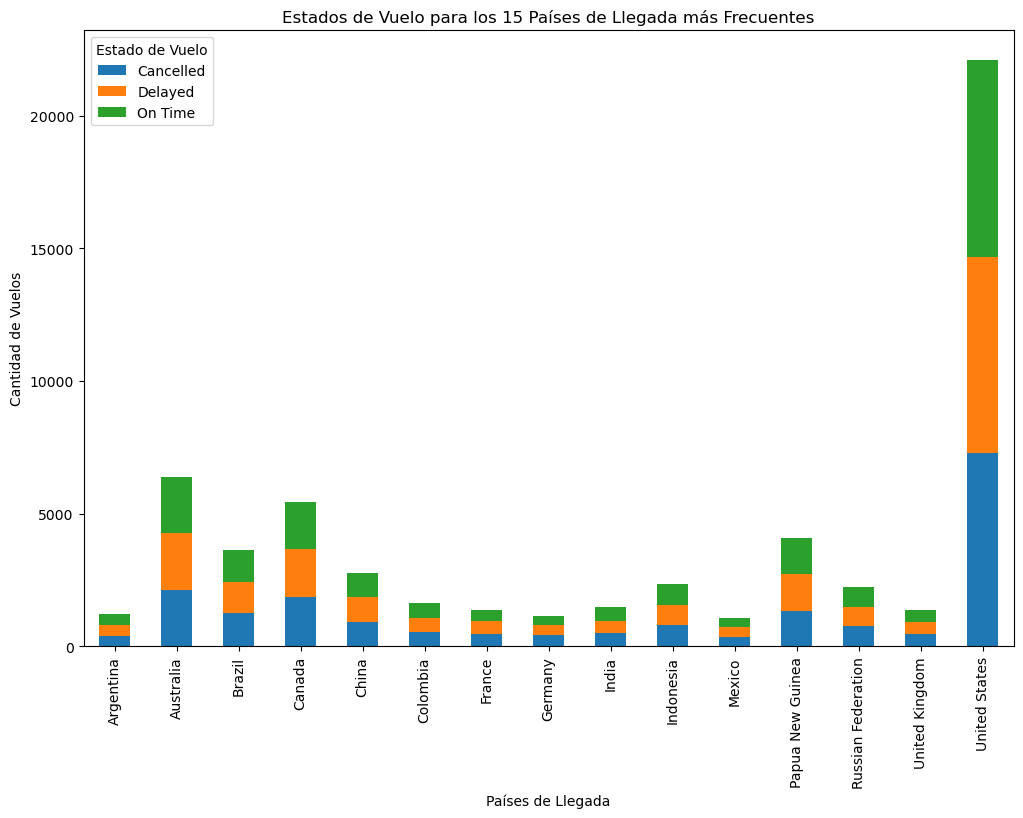

In [39]:
# Paso 1: Filtrar el DataFrame original para incluir solo los 15 países de llegada más frecuentes
top_arrival_countries = df['Country Name'].value_counts().head(15).index
df_top_countries = df[df['Country Name'].isin(top_arrival_countries)]

# Paso 2: Crear una tabla de contingencia entre los estados de vuelo y los países de llegada
contingency_table = pd.crosstab(df_top_countries['Country Name'], df_top_countries['Flight Status'])

# Paso 3: Visualizar el gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Estados de Vuelo para los 15 Países de Llegada más Frecuentes')
plt.xlabel('Países de Llegada')
plt.ylabel('Cantidad de Vuelos')
plt.legend(title='Estado de Vuelo')
plt.show()

In [40]:
# Paso 1: Identificar el aeropuerto con más llegadas
top_arrival_airport = df['Arrival Airport'].value_counts().idxmax()
print("El aeropuerto con más llegadas es:", top_arrival_airport)

# Paso 2: Filtrar el DataFrame original para incluir solo las llegadas al aeropuerto con más llegadas
flights_to_top_arrival_airport = df[df['Arrival Airport'] == top_arrival_airport]

# Paso 3: Calcular las cinco nacionalidades más frecuentes entre los viajeros que llegaron a ese aeropuerto
top_5_nationalities = flights_to_top_arrival_airport['Nationality'].value_counts().head(5)

print("\nLas cinco nacionalidades más frecuentes entre los viajeros que llegaron al aeropuerto con más llegadas son:")
print(top_5_nationalities)

El aeropuerto con más llegadas es: JNB

Las cinco nacionalidades más frecuentes entre los viajeros que llegaron al aeropuerto con más llegadas son:
Philippines    4
China          4
Portugal       3
Brazil         2
Zimbabwe       2
Name: Nationality, dtype: int64


<center><b>Conclusiones y recomendaciones:</b><center>

Podemos observar que no existe diferencia notoria en los distintos estados de los vuelos, esto debe llevar a un plan de acción para reducir la cantidad de vuelos demorados y cancelados.
Las 5 nacionalidades más comunes entre los pasajeros en vuelos internacionales son:
China          18317
Indonesia      10559
Russia          5693
Philippines     5239
Brazil          3791
Las 5 nacionalidades menos comunes entre los pasajeros en vuelos internacionales son:
Romania                   2
British Virgin Islands    2
Jersey                    1
Norfolk Island            1
Sint Maarten              1
También tenemos países más elegidos y su distribución por género.

Esta información es muy valiosa para el departamento de marketing .

Informamos los Pilotos con mayor cantidad de vuelos cancelados, no es un número significativo , pero se debe prestar atención.
Las hipótesis planteadas , nos muestran que debemos obtener más datos para poder tener resultados más favorables.



*En la entrega anterior el resultado de la Precisión del modelo: 0.3318498056067117
Los resultados tuvieron una mejora mínima , en principio es necesario mejorar la fuente de datos ya que con los datos actuales no se obtienen resultados considerables.*  
Nueva Precisión del modelo: 0.33630038878657664


In [41]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Eliminar columnas que no se usarán en el modelo
columns_to_drop = ['Passenger ID', 'First Name', 'Last Name', 'Continents','Airport Continent'  ,'Pilot Name', 'Country Name', 'Arrival Airport']
df = df.drop(columns=columns_to_drop)


# Eliminar la columna original 'Departure Date'
df = df.drop(columns=['Departure Date'])

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['Gender', 'Nationality', 'Airport Country Code','Airport Name' ])

# Separar features y target
X = df_encoded.drop(columns=['Flight Status'])
y = df_encoded['Flight Status']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.3327706159197872


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print("Métricas de evaluación:")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)

Métricas de evaluación:
Precisión: 0.3344754905553394
Recall: 0.3327706159197872
F1-Score: 0.28017637889161473
Accuracy: 0.3327706159197872
Matriz de confusión:
[[4739 1019  744]
 [4728  951  780]
 [4792  980  815]]
